<a href="https://colab.research.google.com/github/antoniogss/radiography_brazilian_universities_2021/blob/main/cruzamento_bds_ces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

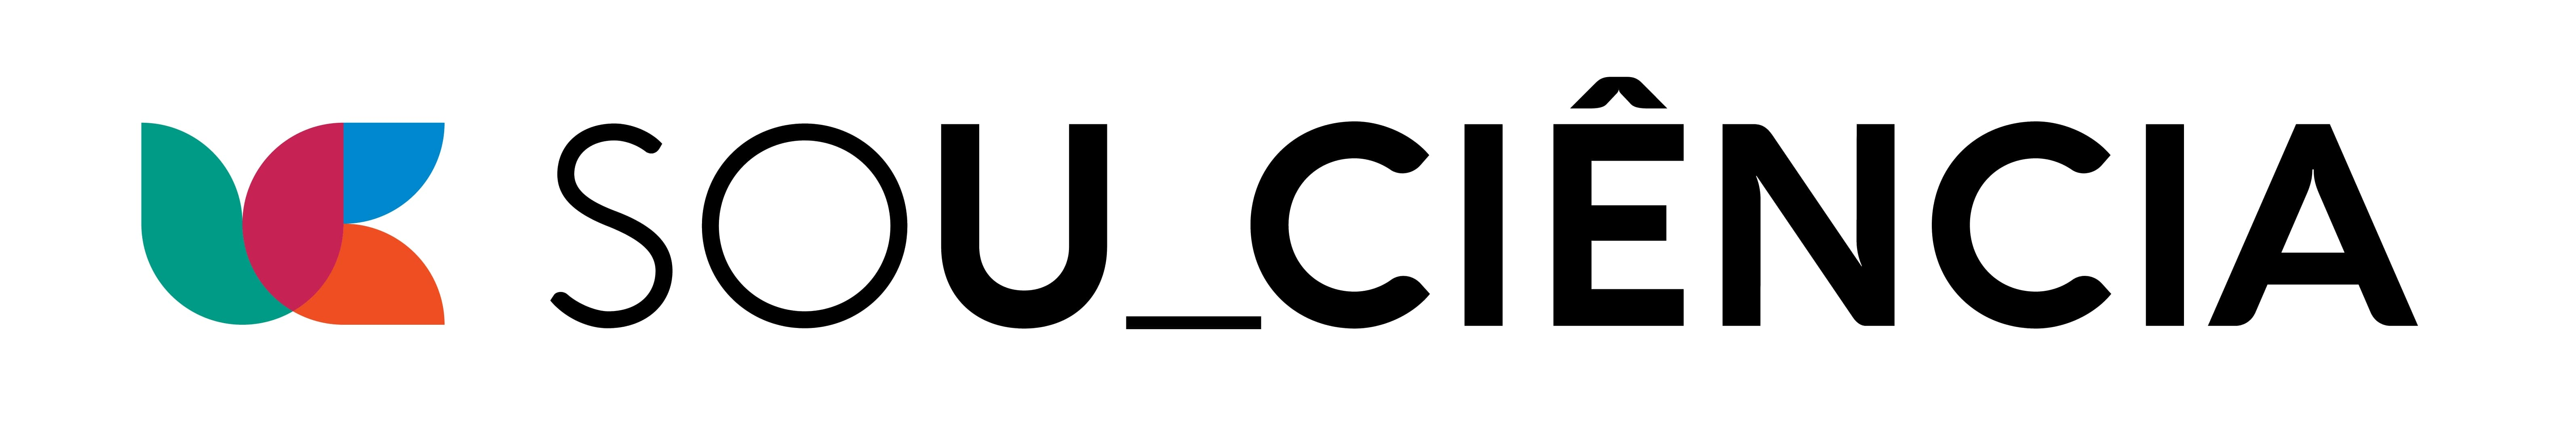

# Descrição

Desenvolvimento de um script em Python para limpeza dos dados do CES.

Autor: Antonio Guerreiro Silva Serrano

Bolsista: Pesquisador de Apoio Técnico

Início: 27-09-2023

Atualizado: 27-09-2023

# Importação das bibliotecas

In [ ]:
# Bibliotecas já instaladas

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import google.colab as gc
import re

import warnings

# Desativar o FutureWarning para a função replace
warnings.filterwarnings("ignore", category=FutureWarning)

# Instalação e importação de bibliotecas específicas

In [ ]:
%%capture
%%shell

# Não separar as bibliotecas por vírgulas, apenas espaços.

libraries=("unidecode")

for library in "${libraries[@]}"; do
    pip install "$library"
done

In [ ]:
# Importação das bibliotecas instaladas

from unidecode import unidecode

# Integração com o Google Drive

In [ ]:
# Validação de usuário

gc.drive.mount('/content/drive')

gc.output.clear()

# Definindo o diretório de trabalho atual

In [ ]:
%cd ./drive/MyDrive/SoU_Ciencia/radiografia_universidades_21/

/content/drive/MyDrive/SoU_Ciencia/radiografia_universidades_21


# Atribuição de variáveis ao caminho relativo dos diretórios

In [ ]:
ces = './ces_2021/dados/'

capes = './dados_capes/'

# Criação dos dataframes

In [ ]:
# Identificar o separador ("sep") dos arquivos .CSV ou .csv

%%shell

caminho="./ces_2021/dados/"

for arquivo_csv in $caminho*.CSV $caminho*.csv; do
    if [ -f "$arquivo_csv" ]; then
        echo "Arquivo: $arquivo_csv"

        delimitadores=("," ";" "\t" "|")

        for delimitador in "${delimitadores[@]}"; do
            resultado=$(head -n 1 "$arquivo_csv" | grep -o "$delimitador" | wc -l)

            if [ "$resultado" -gt 0 ]; then
                echo "Separador: $delimitador"
                break
            fi
        done

        echo "--------------------------------------------------------"
    fi
done

Arquivo: ./ces_2021/dados/cadastro_cursos.CSV
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_ies.CSV
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_cursos_atualizado.csv
Separador: ;
--------------------------------------------------------
Arquivo: ./ces_2021/dados/cadastro_ies_atualizado.csv
Separador: ;
--------------------------------------------------------


In [ ]:
cadastro_ies_atualizado = pd.read_csv(ces + 'cadastro_ies.CSV', sep=';', encoding='iso-8859-1', low_memory=False)

cadastro_cursos_atualizado = pd.read_csv(ces + 'cadastro_cursos_atualizado.csv', sep=';', encoding='utf-8', low_memory=False)

# Identificação de colunas em comum dos dfs

In [ ]:
# Identificar as colunas em comum entre os DataFrames
colunas_comuns = set(cadastro_cursos_atualizado.columns) & set(cadastro_ies_atualizado.columns)

# Imprimir os nomes das colunas em comum
print("Colunas em comum:", list(colunas_comuns))

Colunas em comum: ['TP_ORGANIZACAO_ACADEMICA', 'SG_IES', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA', 'NO_IES', 'NU_ANO_CENSO']


# Converter todos os elementos das colunas 'NO_IES' e 'SG_IES' para letras maúsculas

In [ ]:
# Obtém todas as variáveis no ambiente global
variaveis_globais = globals()

# Crie uma cópia do dicionário para evitar RuntimeError
variaveis_globais_copia = variaveis_globais.copy()

# Itera sobre as variáveis copiadas para encontrar DataFrames com nomes correspondentes
for var_nome, var_valor in variaveis_globais_copia.items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        # Verifica se as colunas 'NO_IES' e 'SG_IES' estão presentes
        if 'NO_IES' in var_valor.columns and 'SG_IES' in var_valor.columns:
            # Converte os elementos das colunas para letras maiúsculas
            var_valor['NO_IES'] = var_valor['NO_IES'].str.upper()
            var_valor['SG_IES'] = var_valor['SG_IES'].str.upper()

# Elementos únicos das colunas 'CO_IES', 'NO_IES' e 'SG_IES'  

## IESs em Geral

In [ ]:
# Obtém todas as variáveis no ambiente global
variaveis_globais = globals()

# Inicializa um DataFrame vazio para armazenar os resultados
df_padronizacao = pd.DataFrame(columns=['CO_IES', 'NO_IES', 'SG_IES'])

# Crie uma cópia do dicionário para evitar RuntimeError
variaveis_globais_copia = variaveis_globais.copy()

# Itera sobre as variáveis copiadas para encontrar DataFrames com nomes correspondentes
for var_nome, var_valor in variaveis_globais_copia.items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        # Verifica se o DataFrame tem as colunas 'CO_IES', 'NO_IES' e 'SG_IES'
        if all(coluna in var_valor.columns for coluna in ['CO_IES', 'NO_IES', 'SG_IES']):
            df_padronizacao = df_padronizacao.append(var_valor[['CO_IES', 'NO_IES', 'SG_IES']])

# Remove duplicatas e redefine o índice
df_padronizacao = df_padronizacao.drop_duplicates().reset_index(drop=True)

# Converte todas as letras das colunas 'NO_IES' e 'SG_IES' para maiúsculas
df_padronizacao['NO_IES'] = df_padronizacao['NO_IES'].str.upper()
df_padronizacao['SG_IES'] = df_padronizacao['SG_IES'].str.upper()

# Imprime o DataFrame df_padronizacao com a ordem desejada das colunas
df_padronizacao = df_padronizacao[[
                                   'CO_IES',
                                   'NO_IES',
                                   'SG_IES'
                                  ]]

# Use o método to_string() para exibir o df_padronizacao
# print(df_padronizacao.to_string(index=False))

In [ ]:
# Número de IESs únicas no BD CES

df_padronizacao.shape[0]

2574

## IESs públicas

In [ ]:
# Criar um DataFrame vazio para df_ies_publica
df_ies_publica = pd.DataFrame(columns=['CO_IES', 'NO_IES', 'SG_IES'])

# Supondo que você já tenha carregado o DataFrame df_padronizacao
# Se não tiver carregado, carregue-o usando pd.read_csv() ou outra função apropriada

# Aplicar o filtro ao DataFrame df_padronizacao
condicao = df_padronizacao['NO_IES'].str.startswith((
                                                     'UNIVERSIDADE FEDERAL',
                                                     'UNIVERSIDADE ESTADUAL',
                                                     'UNIVERSIDADE DO ESTADO',
                                                     'UNIVERSIDADE MUNICIPAL',
                                                     'UNIVERSIDADE DO MUNICÍPIO'
                                                     'INSTITUTO FEDERAL',
                                                     'INSTITUTO NACIONAL',
                                                     'INSTITUTO ESTADUAL',
                                                     'FUNDAÇÃO UNIVERSIDADE',
                                                     'CENTRO FEDERAL',
                                                     'ASSOCIAÇÃO',
                                                     'FACULDADE DE TECNOLOGIA DE', #FATECs
                                                     ))
df_ies_publica = df_padronizacao[condicao].copy()

# Converte todas as letras das colunas 'NO_IES' e 'SG_IES' para maiúsculas
df_ies_publica['NO_IES'] = df_ies_publica['NO_IES'].str.upper()
# df_ies_publica['SG_IES'] = df_ies_publica['SG_IES'].str.upper()

# Imprime o DataFrame df_ies_publica com a ordem desejada das colunas
df_ies_publica = df_ies_publica[[
    'CO_IES',
    'NO_IES',
    'SG_IES'
]]

# Use o método to_string() para exibir o df_ies_publica
# print(df_ies_publica.to_string(index=False))

In [ ]:
df_ies_publica.shape[0]

171

# Identificação de caracteres especiais nas colunas 'NO_IES' e 'SG_IES'

In [ ]:
# Expressão regular para caracteres especiais
caracteres_especiais = r'\(.*\)|\[.*\]|\{.*\}|[\'"].*?[\'"]|(?<=\s[-–—]\s)|[!@#$%^&*+=<>?¿.;:_{}|~"\[\]\\]'

# Verifica se as colunas 'NO_IES' ou 'SG_IES' contêm caracteres especiais
linhas_com_caracteres_especiais = df_padronizacao[df_padronizacao['NO_IES'].str.contains(caracteres_especiais) | df_padronizacao['SG_IES'].str.contains(caracteres_especiais)]

# Use o método to_string() para exibir o df_padronizacao
# print(linhas_com_caracteres_especiais.to_string(index=False))

In [ ]:
linhas_com_caracteres_especiais.shape[0]

217

# Remoção de termos após traço entre espaços

In [ ]:
# Lista de IESs que devem ser ignoradas

ignorar = [
            'CLARETIANO - CENTRO UNIVERSITÁRIO',
            'CLARETIANO - FACULDADE DE BOA VISTA',
            'FACULDADE JK - UNIDADE II',
            'FACULDADE JK - UNIDADE I',
            'CENTRO UNIVERSITÁRIO AESO -  BARROS MELO',
            'FACULDADE ÁGORA - ADMINISTRAÇÃO, EDUCAÇÃO E CULTURA',
            'LIBERTAS - FACULDADES INTEGRADAS',
            'FATEC - FACULDADE DE TEOLOGIA E CIÊNCIAS DE VOTUPORANGA',
            'FACULDADE DE TECNOLOGIA EM SAÚDE - IAHCS',
            'CENTRO UNIVERSITÁRIO - CATÓLICA DE SANTA CATARINA EM JOINVILLE',
            'CISNE - FACULDADE DE QUIXADÁ',
            'CISNE - FACULDADE TECNOLÓGICA DE QUIXADÁ',
            'FACULDADE DE TECNOLOGIA - FATEC DE RIBEIRÃO PRETO',
            'FACULDADE ASSOCIADA BRASIL - EAD',
            'FACULDADE DE TECNOLOGIA E CIÊNCIAS - FTC N. SRA. DO SOCORRO',
            'INSTITUTO DE DESENVOLVIMENTO E APRENDIZAGEM - IDEA SÃO LUIZ',
            'FACULDADE UNIDA DE SÃO PAULO - EAD',
            'FI - FACULDADE IGUAÇU'
]

In [ ]:
# Função para remover termos após o traço e verificar a lista 'ignorar'
def remover_termos_ignorados(texto):
    for i in ignorar:
        if i in texto:
            return i
    partes = texto.split(' - ')
    return partes[0]

# Itera sobre os DataFrames no ambiente global
for var_nome, var_valor in globals().items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        if 'NO_IES' in var_valor.columns:
            var_valor['NO_IES'] = var_valor['NO_IES'].apply(remover_termos_ignorados)

# Substituições de termos específicos I

Fragmentos

In [ ]:
# Este código aplicará as substituições considerando também os fragmentos de string correspondentes aos termos na coluna
substituicoes_frag = {
                      'FACUDADE': 'FACULDADE',
                      'CIENCIA': 'CIÊNCIA',
                      'UNIVERSITARIO': 'UNIVERSITÁRIO',
                      'PARNAIBA': 'PARNAÍBA',
                      'CARAPICUIBA': 'CARAPICUÍBA',
                      'FUNDAÇÃO UNIVERSIDADE FEDERAL': 'UNIVERSIDADE FEDERAL',
                      'FUNDAÇÃO UNIVERSIDADE DO ESTADO': 'UNIVERSIDADE DO ESTADO',
                      'EURÍPEDES': 'EURÍPIDES',
                      'MAURICIO': 'MAURÍCIO',
                      'PERUIBE': 'PERUÍBE',
                      'RONDONIA': 'RONDÔNIA',
                      'MESSIANICA': 'MESSIÂNICA',
                      'FELIX': 'FÉLIX',
                      'GOIANIA':  'GOIÂNIA',
                      'ARARANGUA': 'ARARANGUÁ',
                      'PADRAO': 'PADRÃO',
                      'CIENCIAS': 'CIÊNCIAS',
                      'JOINVILE': 'JOINVILLE',
                      'SOLIDARIA': 'SOLIDÁRIA',
                      'PITAGORAS': 'PITÁGORAS',
                      'SANTISSIMA': 'SANTÍSSIMA',
                      'MARILIA': 'MARÍLIA',
                      'INES': 'INÊS',
                      'BARBARA': 'BÁRBARA',
                      'BRASILIA':  'BRASÍLIA',
                      'IMPETRATRIZ': 'IMPERATRIZ',
                      'MARINGA': 'MARINGÁ',
                      'PAJEU': 'PAJEÚ',
                      'ADELIO': 'ADÉLIO',
                      'DEL REI': 'DEL-REI',
                      'ESTADUAL DO CENTRO OESTE': 'ESTADUAL DO CENTRO-OESTE',
                      'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA',
                      'FUNDAÇÃO UNIVERSIDADE VIRTUAL': 'UNIVERSIDADE VIRTUAL'
}

In [ ]:
# Função para aplicar as substituições
def aplicar_substituicoes(texto):
    for antigo_termo, novo_termo in substituicoes_frag.items():
        texto = texto.replace(antigo_termo, novo_termo)
    return texto

# Itera sobre os DataFrames no ambiente global
for var_nome, var_valor in globals().items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        if 'NO_IES' in var_valor.columns:
            var_valor['NO_IES'] = var_valor['NO_IES'].apply(aplicar_substituicoes)

# Substituição de termos específicos - II

Integralmente

In [ ]:
# Substituições integrais
substituicoes_int = {
                      'UNIVERSIDADE DO ESTADO DE MATO GROSSO CARLOS ALBERTO REYES MALDONADO': 'UNIVERSIDADE DO ESTADO DE MATO GROSSO',
                      'FACULDADE DE CASTELO': 'FACULDADE DE CASTELO - MULTIVIX CASTELO',
                      'CENTRO UNIVERSITÁRIO UNIDOM': 'CENTRO UNIVERSITÁRIO UNIDOM-BOSCO',
                      'FIAM-FAAM': 'FIAM-FAAM - CENTRO UNIVERSITÁRIO',
                      'ABEU': 'ABEU - CENTRO UNIVERSITÁRIO',
                      'AJES': 'AJES - FACULDADE DO VALE DO JURUENA',
                      'FACULDADE INESP': 'FACULDADE INESP - INSTITUTO NACIONAL DE ENSINO E PESQUISA',
                      'FANEESP': 'FANEESP - FACULDADE NACIONAL DE EDUCAÇÃO E ENSINO SUPERIOR DO PARANÁ',
                      'FACULDADE DO INSTITUTO NACIONAL DE PÓS-GRADUAÇÃO DE SÃO JOSÉ DOS CAMPOS FACULDADE INPG': 'FACULDADE DO INSTITUTO NACIONAL DE PÓS-GRADUAÇÃO DE SÃO JOSÉ DOS CAMPOS',
                      'FAJOPA': 'FAJOPA - FACULDADE JOÃO PAULO II',
                      # 'FI': 'FI - FACULDADE IGUAÇU',
                      'INSTITUTO DE EDUCAÇÃO SUPERIOR PRESIDENTE KENNEDY': 'INSTITUTO DE EDUCAÇÃO SUPERIOR PRESIDENTE KENNEDY - CENTRO DE FORMAÇÃO DE PROFISSIONAIS DE EDUCAÇÃO',
                      'FATECE': 'FATECE - FACULDADE DE TECNOLOGIA, CIÊNCIAS E EDUCAÇÃO',
                      'FANEESP': 'FANEESP - FACULDADE NACIONAL DE EDUCAÇÃO E ENSINO SUPERIOR DO PARANÁ',
                      'ESTÁCIO FATERN': 'ESTÁCIO FATERN - FACULDADE ESTÁCIO DO RIO GRANDE DO NORTE',
                      'FUNDAÇÃO UNIVERSIDADE FEDERAL DO PAMPA': 'UNIVERSIDADE FEDERAL DO PAMPA',
                      'FACITEN': 'FACITEN - FACULDADE DE CIÊNCIAS E TECNOLOGIAS DE NATAL',
                      'FETAC': 'FETAC - FACULDADE DE EDUCAÇÃO, TECNOLOGIA E ADMINISTRAÇÃO DE CAARAPÓ',
                      'IPOG': 'IPOG - INSTITUTO DE PÓS-GRADUAÇÃO & GRADUAÇÃO',
                      'SOBRESP': 'SOBRESP - FACULDADE DE CIÊNCIAS DA SAÚDE',
                      'EMGE': 'EMGE - ESCOLA DE ENGENHARIA',
                      'FACULDADE UNIRB JOÃO PESSOA': 'FACULDADE UNIRB',
                      'FACULDADE UNIRB PARNAMIRIM': 'FACULDADE UNIRB',
                      'FTRB': 'FTRB - FACULDADE TEOLÓGICA REFORMADA DE BRASÍLIA',
                      'EJ': 'EJ - FACULDADE DE TECNOLOGIA EM AVIAÇÃO CIVIL',
                      'INSTED': ' INSTED - INSTITUTO AVANÇADO DE ENSINO SUPERIOR E DESENVOLVIMENTO HUMANO',
                      'FGW': 'FGW - FACULDADE DE GESTÃO WOLI',
                      'FORS': 'FORS - FACULDADE DE EDUCAÇÃO E TECNOLOGIA',
                      'FATEC CRUZEIRO': 'FACULDADE DE TECNOLOGIA DE CRUZEIRO',
                      'UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FI - FACULDADE IGUAÇULHO': 'UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO',
                      'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA  DO TRIÂNGULO MINEIRO': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO TRIÂNGULO MINEIRO',
                      'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA  DE SANTA CATARINA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA',
                      'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA  DO AMAZONAS': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO AMAZONAS',
                      'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA  DA PARAÍBA': 'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DA PARAÍBA',
                      'CENTRO UNIVERSITÁRIO FI - FACULDADE IGUAÇULADÉLFI - FACULDADE IGUAÇUA': 'FI - FACULDADE IGUAÇU',
                      'FACULDADE DE TEOLOGIA DE SÃO PAULO DA IGREJ - FACULDADE DE TECNOLOGIA EM AVIAÇÃO CIVILA PRESBITERIANA INDEPENDENTE DO BRASIL': 'FACULDADE DE TEOLOGIA DE SÃO PAULO DA IGREJA PRESBITERIANA INDEPENDENTE DO BRASIL'
}

In [ ]:
# Função para aplicar as substituições integrais
def aplicar_substituicoes_integrais(texto):
    for antiga_string, nova_string in substituicoes_int.items():
        texto = texto.replace(antiga_string, nova_string)
    return texto

# Itera sobre os DataFrames no ambiente global
for var_nome, var_valor in globals().items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        if 'NO_IES' in var_valor.columns:
            var_valor['NO_IES'] = var_valor['NO_IES'].apply(aplicar_substituicoes_integrais)

# Remoção do caractere '?'

In [ ]:
# Função para remover o caractere '?' sem deixar espaços em branco
def remover_interrogacao_sem_espaco(texto):
    return texto.replace('?', '')

# Itera sobre os DataFrames no ambiente global
for var_nome, var_valor in globals().items():
    if var_nome.startswith("cadastro_") and var_nome.endswith("_atualizado"):
        if 'NO_IES' in var_valor.columns:
            var_valor['NO_IES'] = var_valor['NO_IES'].apply(remover_interrogacao_sem_espaco)

# Correção das siglas das IESs

Inserção individualizada de siglas ausentes.

In [ ]:
# Autentificação de usuário Google

# Tabela do Google Planilhas
from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()

creds, _ = default()

gc = gspread.authorize(creds)

## Criação do df dic_siglas

In [ ]:
# Indicando a tabela do Google Sheets
worksheet = gc.open('siglas_iess').sheet1

# Obtendo todos os valores das linhas
rows = worksheet.get_all_values()

# Convertendo para o formato de dataframe
dic_siglas = pd.DataFrame(rows[1:], columns=rows[0])

## Conversão do df dic_siglas para o dicionário ies_siglas

In [ ]:
# Inicialize o dicionário ies_siglas
ies_siglas = {}

# Função para converter um valor 'chave:valor' em um dicionário e adicioná-lo ao ies_siglas
def converter_para_dicionario(valor):
    chave, valor = valor.split(':')
    ies_siglas[chave.strip()] = valor.strip()

# Aplicar a função a cada valor da coluna 'iess_sem_sigla'
dic_siglas['iess_sem_sigla'].apply(converter_para_dicionario)

# Imprimir chaves e valores juntos em linhas separadas
for chave, valor in ies_siglas.items():
    print(f'{chave}: {valor}')

INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE ALAGOAS: IFAL
UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUITA FILHO: UNESP
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SÃO PAULO: IFSP
UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS: UFNT
UNIVERSIDADE FEDERAL DO DELTA DO PARNAÍBA: UFDPar
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE BRASÍLIA: IFB
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO CEARÁ: IFCE
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DA PARAÍBA: IFPB
UNIVERSIDADE DO ESTADO DO AMAPÁ: UEAP
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO DO SUL: IFMS
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE MATO GROSSO: IFMT
UNIVERSIDADE FEDERAL DE MATO GROSSO: UFMT
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA: IFSC
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE RONDÔNIA: IFRO
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA FARROUPILHA: IFFAR
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TEC

## Correção das siglas dos dfs cadastro_xxx_atualizado

In [ ]:
# Crie uma lista para armazenar os dataframes que atendem aos critérios
dataframes_a_atualizar = []

# Identifique os dataframes que atendem aos critérios e os armazene na lista
for df_nome, df in globals().items():
    if df_nome.startswith("cadastro_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        if 'NO_IES' in df.columns and 'SG_IES' in df.columns:
            dataframes_a_atualizar.append((df_nome, df))

# Agora, itere sobre a lista de dataframes
for df_nome, df in dataframes_a_atualizar:
    # Atualize a coluna 'SG_IES' com base no dicionário ies_siglas
    df['SG_IES'] = df['NO_IES'].map(ies_siglas)

## Verificação das alterações

In [ ]:
# Crie um DataFrame vazio para df_ies_publica
df_ies_publica = pd.DataFrame(columns=['CO_IES', 'NO_IES', 'SG_IES'])

# Lista para armazenar os nomes dos DataFrames que atendem aos critérios
dataframes_a_processar = []

# Identifique os DataFrames que atendem aos critérios e armazene seus nomes na lista
for df_nome, df in globals().items():
    if df_nome.startswith("cadastro_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_a_processar.append(df_nome)

# Itere sobre a lista de DataFrames e aplique a lógica de filtragem
for df_nome in dataframes_a_processar:
    df = globals()[df_nome]
    condicao = df['NO_IES'].str.startswith((
                                            'UNIVERSIDADE FEDERAL',
                                            'UNIVERSIDADE ESTADUAL',
                                            'UNIVERSIDADE DO ESTADO',
                                            'UNIVERSIDADE MUNICIPAL',
                                            'UNIVERSIDADE DO MUNICÍPIO',
                                            'INSTITUTO FEDERAL',
                                            'INSTITUTO NACIONAL',
                                            'INSTITUTO ESTADUAL',
                                            'FUNDAÇÃO UNIVERSIDADE',
                                            'CENTRO FEDERAL',
                                            'ASSOCIAÇÃO',
                                          ))

    df_ies_publica = pd.concat([df_ies_publica, df[condicao]])

# Converte todas as letras das colunas 'NO_IES' e 'SG_IES' para maiúsculas
df_ies_publica['NO_IES'] = df_ies_publica['NO_IES'].str.upper()
df_ies_publica['SG_IES'] = df_ies_publica['SG_IES'].str.upper()

# Imprime o DataFrame df_ies_publica com a ordem desejada das colunas
df_ies_publica = df_ies_publica[[
    'CO_IES',
    'NO_IES',
    'SG_IES'
]]

# Imprime os valores únicos da coluna 'NO_IES' com as colunas 'SG_IES' e 'CO_IES'
valores_unicos = df_ies_publica[['SG_IES', 'CO_IES', 'NO_IES']].drop_duplicates(subset=['NO_IES'])
print(valores_unicos.to_string(index=False))

      SG_IES CO_IES                                                                         NO_IES
        UFMT      1                                            UNIVERSIDADE FEDERAL DE MATO GROSSO
         UFS      3                                                UNIVERSIDADE FEDERAL DE SERGIPE
        UFAM      4                                               UNIVERSIDADE FEDERAL DO AMAZONAS
        UFPI      5                                                  UNIVERSIDADE FEDERAL DO PIAUÍ
        UFOP      6                                             UNIVERSIDADE FEDERAL DE OURO PRETO
      UFSCAR      7                                             UNIVERSIDADE FEDERAL DE SÃO CARLOS
         UFV      8                                                 UNIVERSIDADE FEDERAL DE VIÇOSA
         UEL      9                                              UNIVERSIDADE ESTADUAL DE LONDRINA
        FURG     12                                             UNIVERSIDADE FEDERAL DO RIO GRANDE
         U

## IESs públicas sem sigla definida

In [ ]:
# Filtra os valores únicos da coluna 'NO_IES' onde 'SG_IES' é NaN
valores_unicos = df_ies_publica[df_ies_publica['SG_IES'].isna()][['SG_IES', 'CO_IES', 'NO_IES']].drop_duplicates(subset=['NO_IES'])

print(valores_unicos.to_string(index=False))

Empty DataFrame
Columns: [SG_IES, CO_IES, NO_IES]
Index: []


# Visualização de NaNs nos dfs cadastro_xxx_atualizado

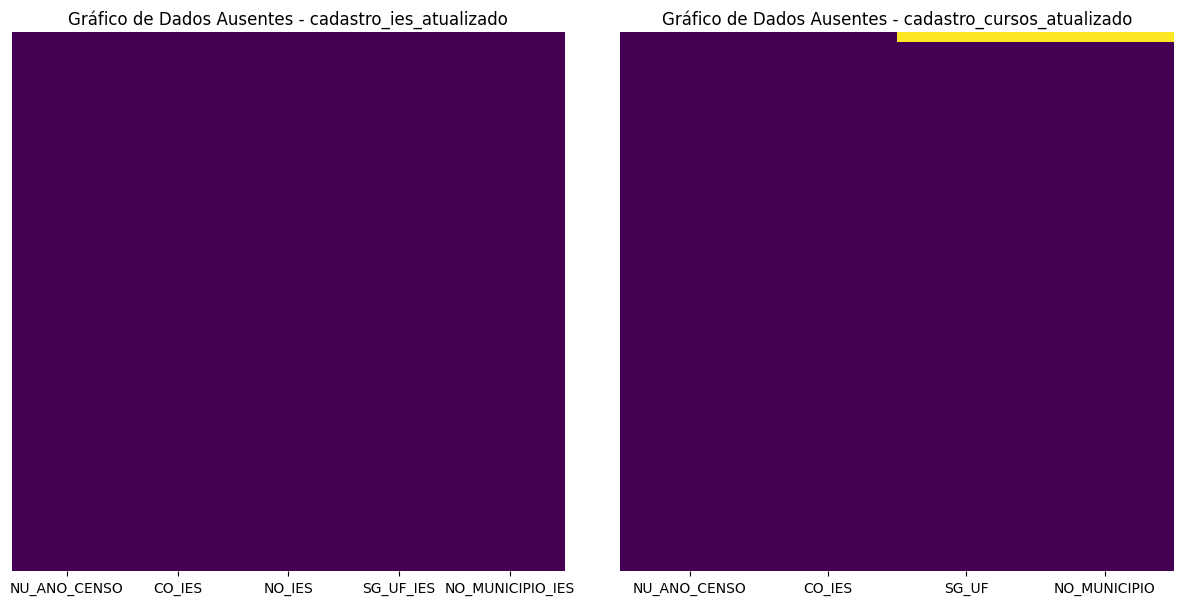

In [ ]:
# Lista de dataframes que atendem aos critérios
dataframes_cadastro = [(df_nome, df) for df_nome, df in globals().items() if df_nome.startswith("cadastro_") and isinstance(df, pd.DataFrame)]

# Dicionário com as colunas de interesse para cada dataframe
columns_of_interest = {
    'cadastro_ies_atualizado': ['NU_ANO_CENSO', 'CO_IES', 'NO_IES', 'SG_UF_IES', 'NO_MUNICIPIO_IES'],
    'cadastro_cursos_atualizado': ['NU_ANO_CENSO', 'CO_IES','SG_UF', 'NO_MUNICIPIO']
}

# Criar subplots para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.1)

for i, (df_nome, df) in enumerate(dataframes_cadastro):
    ax = axs[i]

    # Verificar se o dataframe tem colunas de interesse definidas
    if df_nome in columns_of_interest and all(col in df.columns for col in columns_of_interest[df_nome]):
        sns.heatmap(df[columns_of_interest[df_nome]].isnull(),
                    yticklabels=False,
                    cbar=False,
                    cmap='viridis',
                    ax=ax)

        ax.set_title(f"Gráfico de Dados Ausentes - {df_nome}")
    else:
        ax.set_title(f"Colunas de Interesse Ausentes - {df_nome}")

plt.show()

In [ ]:
# Filtre o DataFrame com base nos critérios e selecione as colunas desejadas
subdataframe_ies_geral = cadastro_cursos_atualizado[(cadastro_cursos_atualizado['SG_UF'].isna()) & (cadastro_cursos_atualizado['NO_MUNICIPIO'].isna())][['NO_IES', 'SG_IES', 'CO_IES']]

# Remova duplicatas com base nas colunas 'NO_IES', 'SG_IES', 'CO_IES'
# subdataframe_ies_geral = subdataframe_ies_geral.drop_duplicates()

# Use o método to_string() para exibir o subdataframe_ies_geral
# print(subdataframe_ies_geral.to_string(index=False))

In [ ]:
# Número de cursos em IESs (SG_IES = NO_MUNICIPIO = NaN)
subdataframe_ies_geral.shape[0]

7948

## IESs públicas (SG_IES = NO_MUNICIPIO = NaN)

In [ ]:
# Filtre o DataFrame com base nos critérios e selecione as colunas desejadas
subdataframe_ies_publica = cadastro_cursos_atualizado[(cadastro_cursos_atualizado['SG_UF'].isna()) & (cadastro_cursos_atualizado['NO_MUNICIPIO'].isna())][['NO_IES', 'SG_IES', 'CO_IES']]

# Remova duplicatas com base nas colunas 'NO_IES', 'SG_IES', 'CO_IES'
# subdataframe_ies_publica = subdataframe_ies_publica.drop_duplicates()

# Aplicar a lógica de filtragem
condicao = subdataframe_ies_publica['NO_IES'].str.startswith((
                                                              'UNIVERSIDADE FEDERAL',
                                                              'UNIVERSIDADE ESTADUAL',
                                                              'UNIVERSIDADE DO ESTADO',
                                                              'UNIVERSIDADE MUNICIPAL',
                                                              'UNIVERSIDADE DO MUNICÍPIO',
                                                              'INSTITUTO FEDERAL',
                                                              'INSTITUTO NACIONAL',
                                                              'INSTITUTO ESTADUAL',
                                                              'FUNDAÇÃO UNIVERSIDADE',
                                                              'CENTRO FEDERAL'
                                                            ))

# Aplicar a filtragem com base na condição
subdataframe_ies_publica = subdataframe_ies_publica[condicao]

# Use o método to_string() para exibir o subdataframe_ies_publica
# print(subdataframe_ies_publica.to_string(index=False))

In [ ]:
# Número de cursos em IESs públicas (SG_IES = NO_MUNICIPIO = NaN)
subdataframe_ies_publica.shape[0]

489

In [ ]:
# Percentual de cursos em IESs públicas (SG_IES = NO_MUNICIPIO = NaN)
print(round(subdataframe_ies_publica.shape[0] * 100 / subdataframe_ies_geral.shape[0]), '%')

6 %


# Verificação de termo específico

NO_IES == UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS

In [ ]:
# Filtrar o df
filtro = cadastro_ies_atualizado['NO_IES'] == 'UNIVERSIDADE FEDERAL DO NORTE DO TOCANTINS'
df = cadastro_ies_atualizado.loc[filtro, [
                                          'NU_ANO_CENSO',
                                          'CO_IES',
                                          'NO_IES',
                                          'SG_IES',
                                          'SG_UF_IES',
                                          'NO_MUNICIPIO_IES'
                                          ]]

df.head()

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_MUNICIPIO_IES


# Download dos dfs cadastro_xxx_atualizado

In [ ]:
# Diretório de destino
diretorio_destino = ces

# Lista para armazenar os nomes dos DataFrames que atendem aos critérios
dataframes_a_exportar = []

# Identifique os DataFrames que atendem aos critérios e armazene seus nomes na lista
for df_nome, df in globals().items():
    if df_nome.startswith("cadastro_") and df_nome.endswith("_atualizado") and isinstance(df, pd.DataFrame):
        dataframes_a_exportar.append(df_nome)

# Exporte cada DataFrame que atende aos critérios para um arquivo CSV
for df_nome in dataframes_a_exportar:
    df = globals()[df_nome]
    nome_arquivo = f"{df_nome}.csv"
    caminho_destino = os.path.join(diretorio_destino, nome_arquivo)
    df.to_csv(caminho_destino, sep=';', encoding='utf-8', index=False, mode='w')
    print(f"O DataFrame '{df_nome}' foi salvo em '{caminho_destino}'.")

O DataFrame 'cadastro_ies_atualizado' foi salvo em './ces_2021/dados/cadastro_ies_atualizado.csv'.
O DataFrame 'cadastro_cursos_atualizado' foi salvo em './ces_2021/dados/cadastro_cursos_atualizado.csv'.
